In [24]:
import numpy as np
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from matplotlib.colors import LinearSegmentedColormap


In [25]:
# JEU DE DONNEES BRUT
df = pd.read_csv("cardio_train.csv", sep = ";", index_col="id")

# JEU DE DONNEES NETTOYE
# df = pd.read_csv("cardio_train_clean.csv", index_col="id")


df["age_year"] = df["age"] / 365
df = df.drop(columns=["age"])

In [26]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.339358
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.759594
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583562
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.394521
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.980822
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.430137
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967123


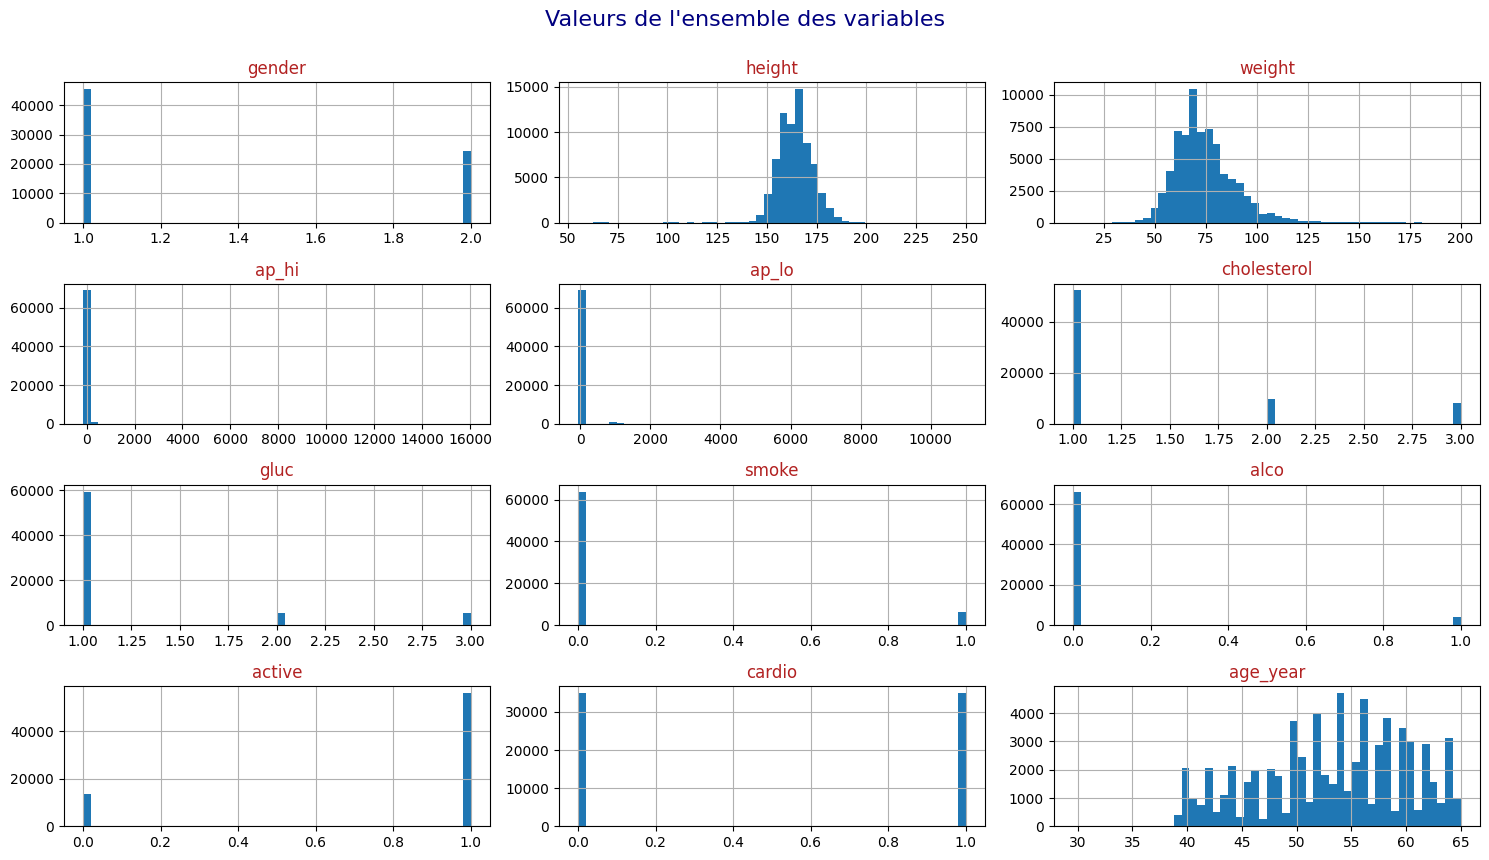

In [27]:
axes = df.hist(bins=50, figsize=(15,9))
plt.suptitle("Valeurs de l'ensemble des variables", fontsize=16, color="navy")
# Modifier la couleur des titres individuels
for ax in axes.ravel():  # ravel() aplatit la grille d'axes
    ax.set_title(ax.get_title(), color='firebrick')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

Text(0.5, 1.0, 'Matrice de corrélation')

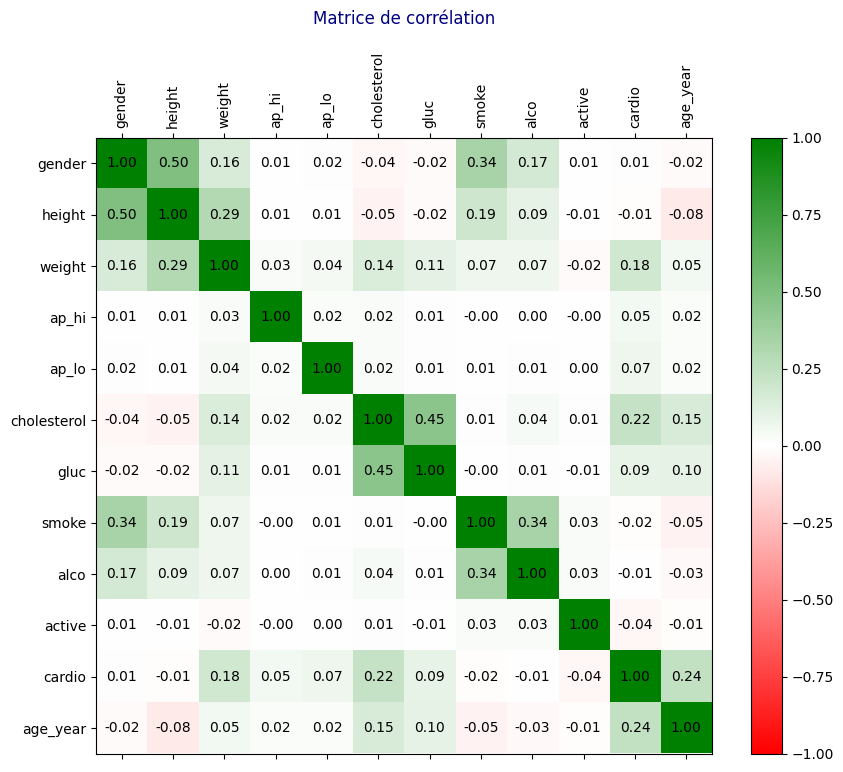

In [28]:
# Création d'une colormap rouge → blanc → vert
cmap = LinearSegmentedColormap.from_list("red_green", ["red", "white", "green"], N=256)

corr = df.corr()

# Tracé de la matrice
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap=cmap, vmin=-1, vmax=1)

# Axes et titre
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Matrice de corrélation", pad=20)
plt.colorbar(cax)

# Ajouter les valeurs dans chaque case
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

plt.title("Matrice de corrélation", pad=20, color="navy")
# plt.show()

In [29]:
df_numerical = ['height', 'weight', 'age_year', 'ap_hi', 'ap_lo']
df_cardinal = ['smoke', 'alco', 'active', 'cardio', 'gender']
df_ordinal = ['cholesterol', 'gluc']

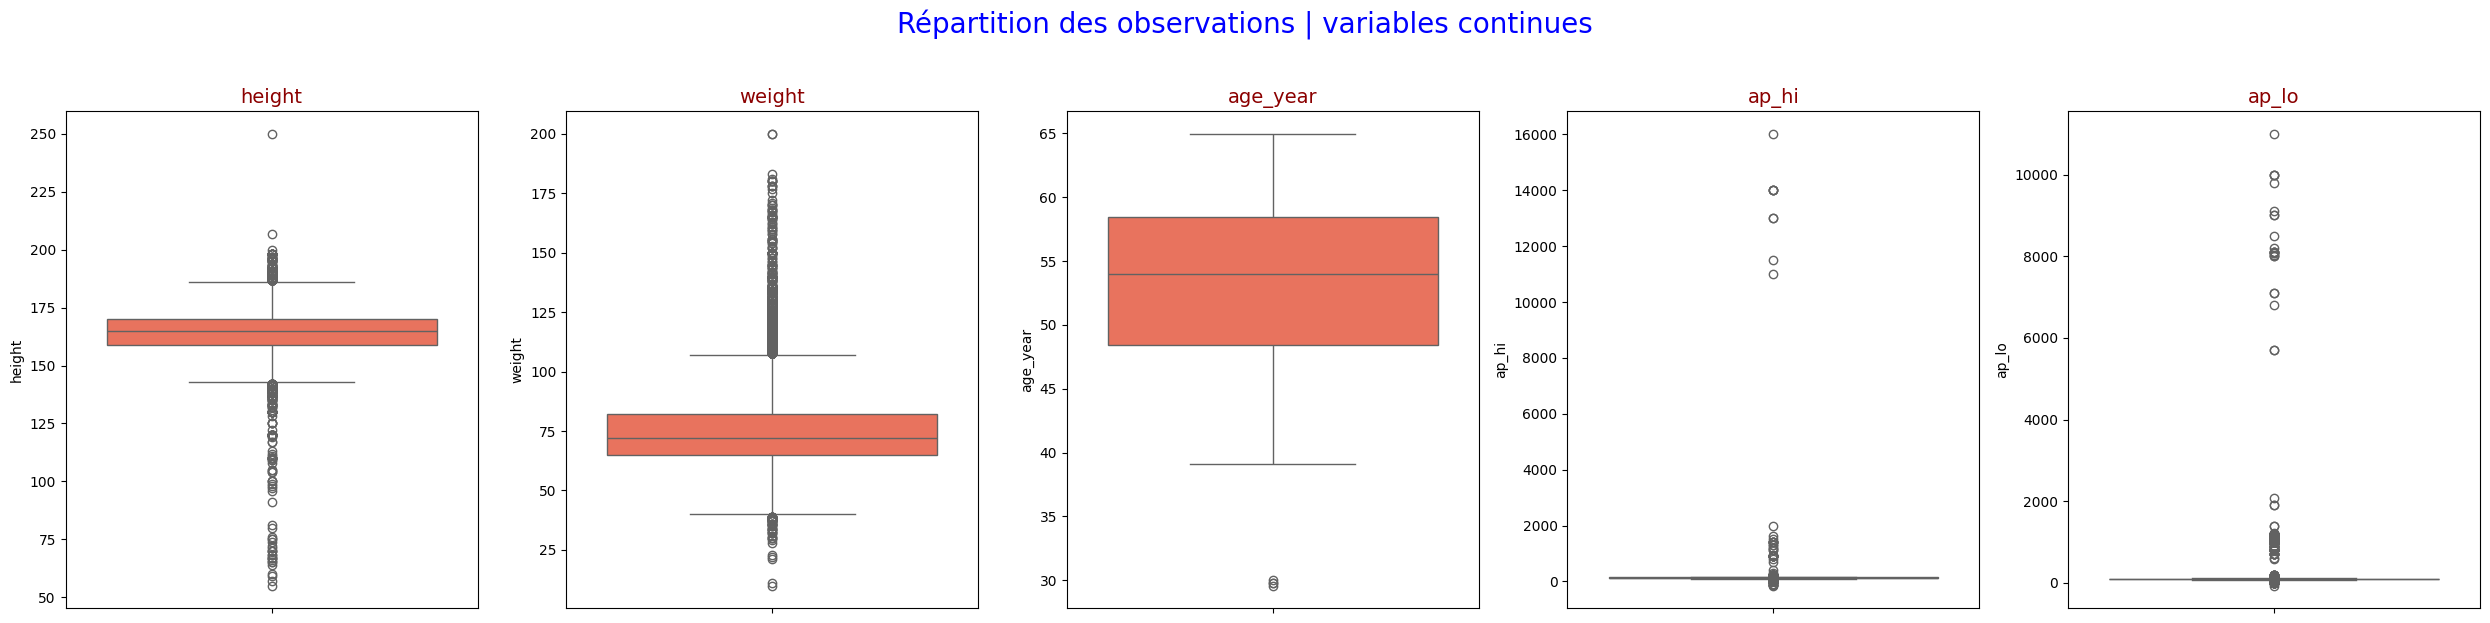

In [49]:
fig, axes = plt.subplots(1, len(df_numerical), figsize=(5 * len(df_numerical), 6))

for ax, col in zip(axes, df_numerical):
    sns.boxplot(y=df[col], ax=ax, color='tomato')
    ax.set_title(col, fontsize=14, color='darkred')

plt.suptitle("Répartition des observations | variables continues", fontsize=20, color="blue", y=1.03)
plt.tight_layout()


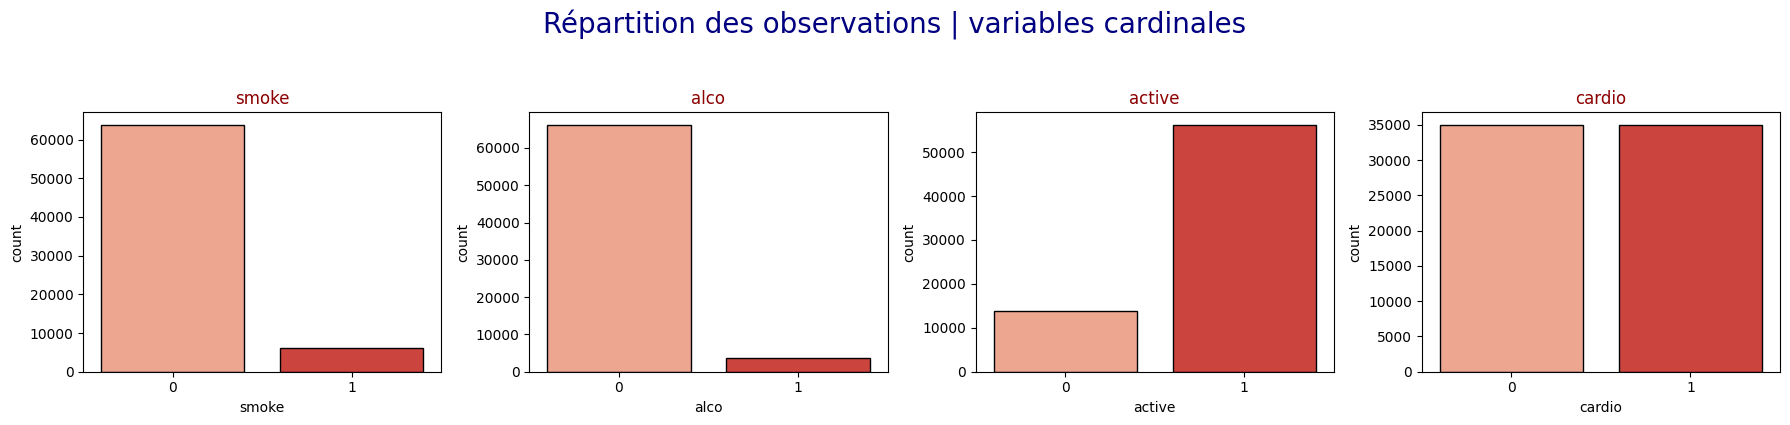

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

for ax, col in zip(axes, df_cardinal):
    sns.countplot(x=col, data=df, hue=col, palette='Reds', legend=False, ax=ax)
    ax.set_title(col, color='darkred')

    # Ajouter une bordure noire aux barres
    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

plt.suptitle("Répartition des observations | variables cardinales", fontsize=20, color='navy', y=1.05)
plt.tight_layout()


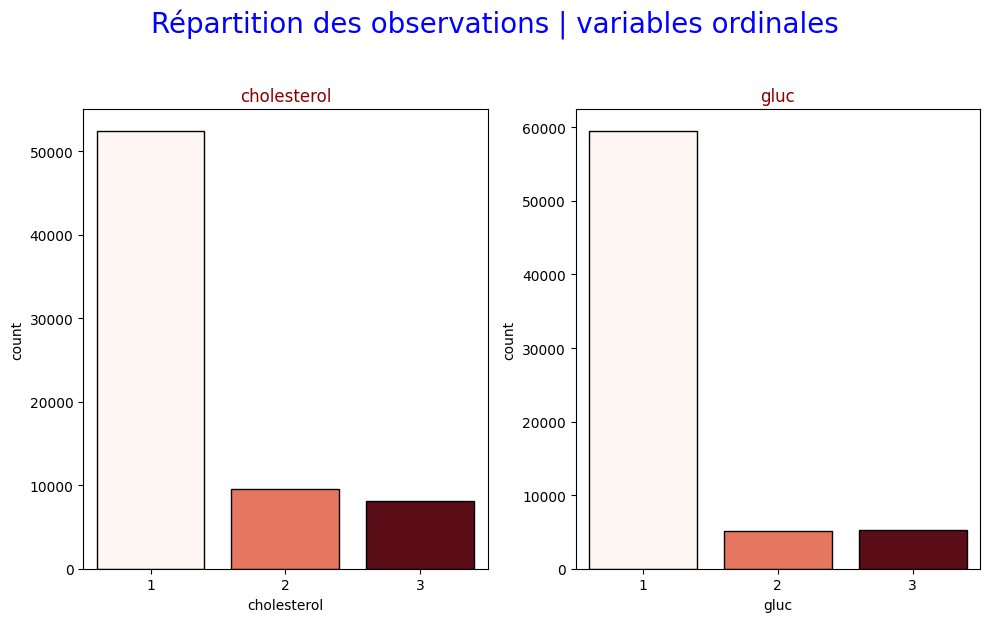

In [ ]:
fig, axes = plt.subplots(1, len(df_ordinal), figsize=(5 * len(df_ordinal), 6))

for ax, col in zip(axes, df_ordinal):
    sns.countplot(x=col, data=df, hue=col, palette='Reds', legend=False, ax=ax)
    ax.set_title(col, color='darkred')

    # Bordure noire aux barres
    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

plt.suptitle("Répartition des observations | variables ordinales", fontsize=20, color="blue", y=1.03)
plt.tight_layout()

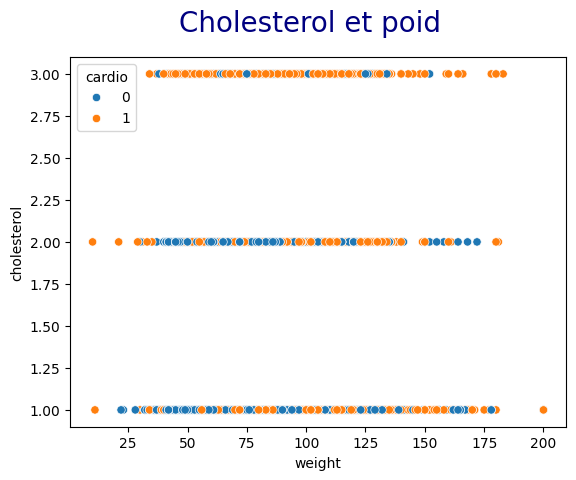

In [33]:
sns.scatterplot(data=df, x='weight', y='cholesterol', hue='cardio')
plt.suptitle("Cholesterol et poid", color="navy", fontsize=20)
plt.show()

Le cholesterol semble être un facteur aggravant

Text(0.5, 0.98, "Nombre des cas en fonction de l'âge")

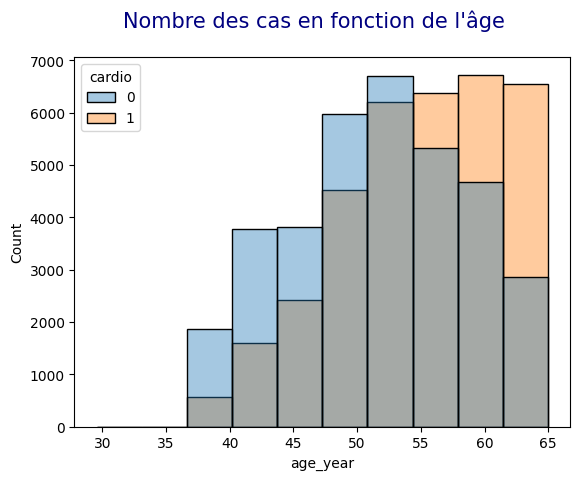

In [34]:
sns.histplot(
    data=df,
    x='age_year',
    hue='cardio',
    bins=10,
    multiple='layer',  # empile les deux couleurs légèrement
    alpha=0.4,          # transparence pour voir les deux
    stat='count'        # on affiche les quantités réelles
)
plt.suptitle("Nombre des cas en fonction de l'âge", color="navy", fontsize=15)

Text(0.5, 0.98, 'Nombre des cas en fonction du poid')

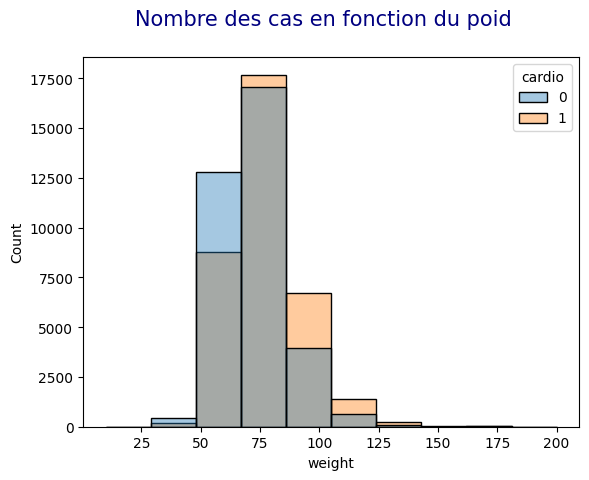

In [35]:
sns.histplot(
    data=df,
    x='weight',
    hue='cardio',
    bins=10,
    multiple='layer',  # empile les deux couleurs légèrement
    alpha=0.4,          # transparence pour voir les deux
    stat='count'        # on affiche les quantités réelles
)
plt.suptitle("Nombre des cas en fonction du poid", color="navy", fontsize=15)

Text(0.5, 0.98, 'Tension diastolique')

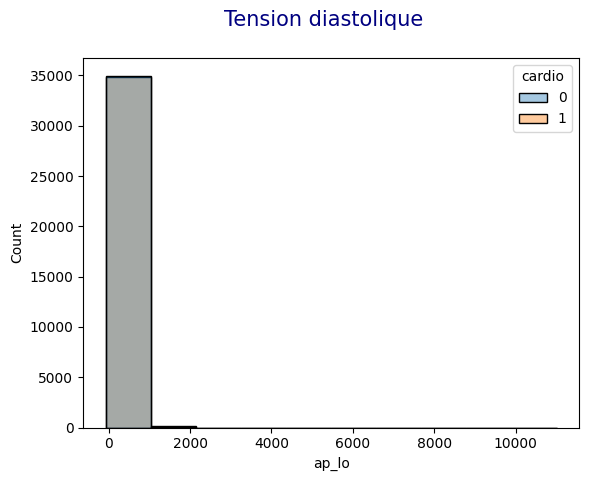

In [36]:
sns.histplot(
    data=df,
    x='ap_lo',
    hue='cardio',
    bins=10,
    multiple='layer',  
    alpha=0.4,        
    stat='count'        
)
plt.suptitle("Tension diastolique", color="navy", fontsize=15)

Text(0.5, 0.98, 'Tension sistoliqpue')

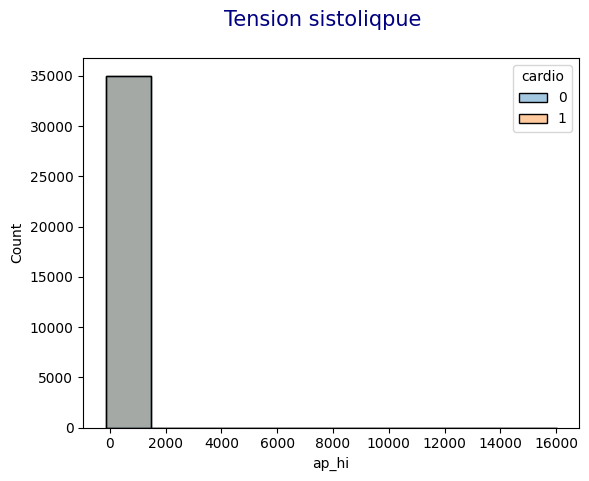

In [37]:
sns.histplot(
    data=df,
    x='ap_hi',
    hue='cardio',
    bins=10,
    multiple='layer', 
    alpha=0.4,         
    stat='count'        
)
plt.suptitle("Tension sistoliqpue", color="navy", fontsize=15)

<Axes: xlabel='cholesterol', ylabel='Count'>

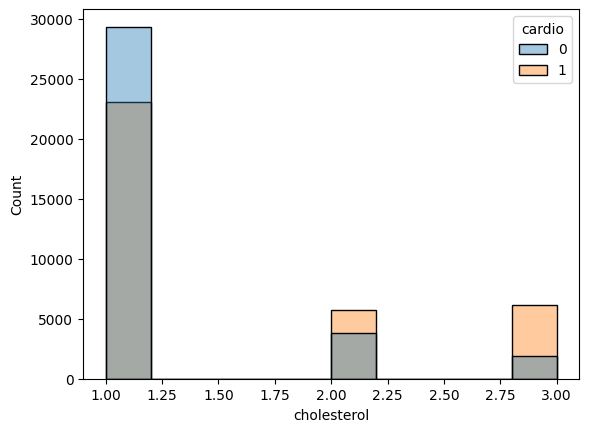

In [38]:
sns.histplot(
    data=df,
    x='cholesterol',
    hue='cardio',
    bins=10,
    multiple='layer', 
    alpha=0.4,         
    stat='count'        
)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [40]:
X = df[["age_year", "gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active"]] 
y = df["cardio"] 


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


c:\Users\coule\Documents\projets\cardio-vasc-risks\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [43]:
y_pred = model.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("Rapport de classification:\n", classification_report(y_test, y_pred))


Accuracy: 0.7236428571428571
Matrice de confusion:
 [[5364 1624]
 [2245 4767]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



In [44]:


# Modèle avec hyperparamètres modifiés
model = LogisticRegression(
    C=0.5,                  # pénalise un peu plus (par défaut c’est 1.0)
    penalty='l2',           # régularisation L2
    solver='saga',         # optimiseur recommandé pour les petits jeux de données
    max_iter=1000,
    class_weight='balanced'  # utile si la classe 1 est très minoritaire
)

model.fit(X_train, y_train)


c:\Users\coule\Documents\projets\cardio-vasc-risks\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000, solver='saga')

In [45]:
y_pred = model.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("Rapport de classification:\n", classification_report(y_test, y_pred))


Accuracy: 0.6997857142857142
Matrice de confusion:
 [[5111 1877]
 [2326 4686]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      6988
           1       0.71      0.67      0.69      7012

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000



## Valeurs cohérentes : 

- 🔹 AP_HIGH : Systolic Blood Pressure (mmHg)

| État                         | Pression systolique |
|------------------------------|----------------------|
| Tension basse (hypotension) | < 90                 |
| Normale                     | 90 – 120             |
| Pré-hypertension / normale haute | 120 – 139       |
| Hypertension (stade 1)      | 140 – 159            |
| Hypertension (stade 2)      | ≥ 160                |
| Urgence hypertensive (extrême) | ≥ 180            |
| Limite extrême tolérable    | Jusqu’à 250          |
|ON SUPRIME les valeur <70 |soit 189 observations|
|ON SUPRIME les valeur|>250 soit 40 observations|


---

- 🔹 AP_LOW : Diastolic Blood Pressure (mmHg)

| État                         | Pression diastolique |
|------------------------------|-----------------------|
| Tension basse (hypotension) | < 60                  |
| Normale                     | 60 – 80               |
| Pré-hypertension            | 80 – 89               |
| Hypertension (stade 1)      | 90 – 99               |
| Hypertension (stade 2)      | ≥ 100                 |
| Urgence hypertensive (critique) | ≥ 120            |
| Limite maximale tolérable   | Jusqu’à 150           |
|ON SUPRIME les valeur <40 |soit 59 observations|
|ON SUPRIME les valeur >150 |soit 975 observations|

---

- 🔹 HEIGHT (Taille en cm)

| Seuil     | Explication                          |
|-----------|--------------------------------------|
| < 100 cm  | Trop petit (erreur ou enfant < 5 ans)|
| > 250 cm  | Extrêmement rare, probablement une erreur |
|ON SUPRIME les valeur <140 | soit 152 observations|
|ON SUPRIME les valeur >220 | soit 1 observations|

---

- 🔹 WEIGHT (Poids en kg)

| Seuil     | Explication                             |
|-----------|-----------------------------------------|
| < 30 kg   | Très maigre (enfant ou erreur)          |
| > 250 kg  | Extrêmement obèse ou mal enregistré     |
|ON SUPRIME les valeur <40 |soit 52 observations|
|ON SUPRIME les valeur >200 | soit 0 observations|


In [46]:
df_clean = df[
    (df['ap_hi'] >= 70) & (df['ap_hi'] <= 250) &
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 150) &
    (df['height'] >= 140) & (df['height'] <= 220) &
    (df['weight'] >= 40) & (df['weight'] <= 200)
]
df_clean.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000
mean,1.349042,164.471150,74.143089,126.625959,81.364954,1.364969,1.225898,0.088125,0.053616,0.803433,0.494939,53.326493
std,0.476671,7.797999,14.255469,16.738005,9.550331,0.679182,0.571863,0.283478,0.225259,0.397405,0.499978,6.760555
min,1.000000,140.000000,40.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583562
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.378082
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.972603
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.419178
max,2.000000,207.000000,200.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967123


### AP_HI
Valeurs < 70 : 189<br>
Valeurs > 250 : 40

### AP_LO
Valeurs < 40 : 59<br>
Valeurs > 150 : 975

### HEIGHT
Valeurs < 140 cm : 152<br>
Valeurs > 220 cm : 1

### WEIGHT
Valeurs < 40 kg : 52<br>
Valeurs > 250 kg : 0
